In [22]:
# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.4f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl

In [23]:
ISINs = ['IWDA', 'IE00B18GC888', 'XAD5']
Nomes=['IWDA', 'VG_GB', 'XAD5']

Quotes = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col='Date', parse_dates=True)[ISINs].dropna().loc[:'2020-12-31']
Quotes.columns=Nomes

In [24]:
%%time
portfolio_pl = pl.compute_portfolio(Quotes, [0.34, 0.33, 0.33])

Wall time: 83.8 ms


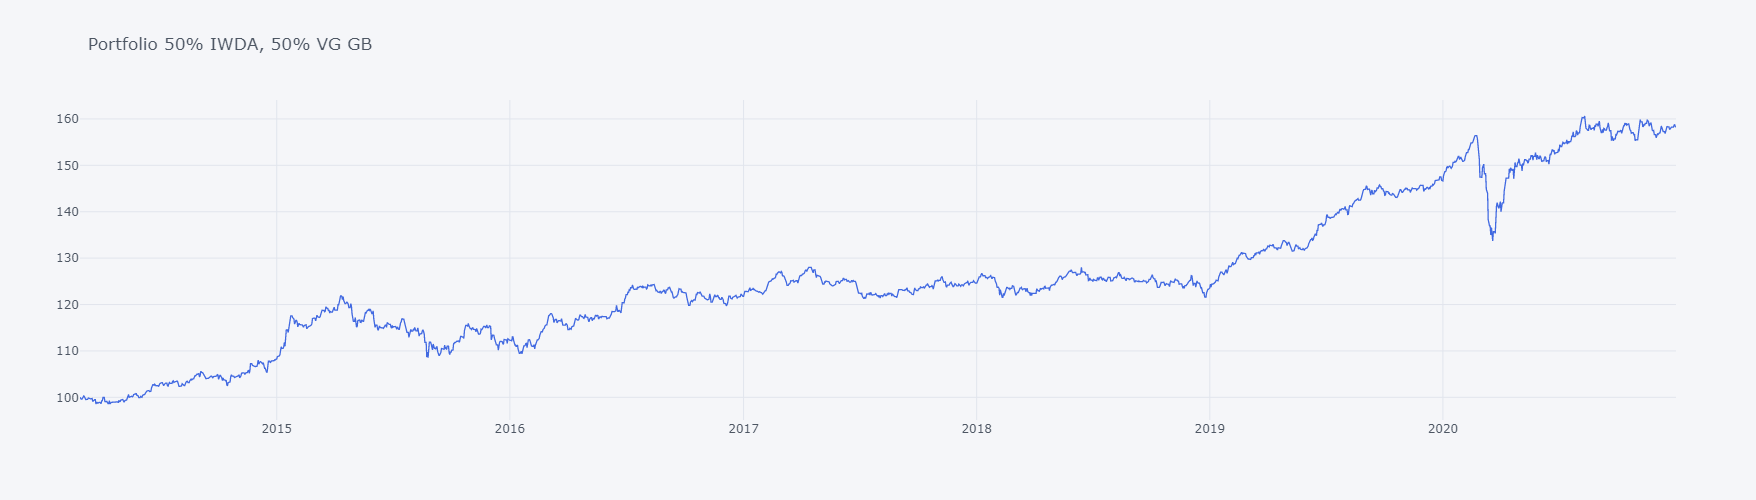

In [25]:
portfolio_pl.iplot(dimensions=pl.dimensions, color='royalblue', title='Portfolio 50% IWDA, 50% VG GB')

In [26]:
portfolio_pl

,Portfolio
2014-02-27,100.0000
2014-02-28,99.5900
2014-03-01,99.5900
2014-03-02,99.5900
2014-03-03,99.9400
...,...
2020-12-27,158.2500
2020-12-28,158.6700
2020-12-29,158.7400
2020-12-30,158.3100


In [27]:
pl.compute_performance_table(portfolio_pl)

**Performance from 2014-02-27 to 2020-12-31 (≈ 6.8 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
Portfolio,6.93%,58.26%,6.12%,1.1300,-14.50%,0.4800


## Criação de nova função de portfolio com contribuição de cada activo

In [28]:
%%time
#it

weights = [0.5, 0.5]
n_assets = len(weights)

# Normalizar valores para 1
Quotes_norm = Quotes / Quotes.iloc[0]

# Calcular a evolução de cada activo
Evolução_individual = Quotes_norm * weights * 100

# Contribuição diária
Contribuição_diária_individual = Evolução_individual - Evolução_individual.shift(1)

# Contribuição individual cumulativa
Contribuição_cumulativa_individual = Contribuição_diária_individual.cumsum()

# Portfolio calculation as sum of cumulative contributions
Portfolio = pd.DataFrame(Contribuição_cumulativa_individual.sum(axis=1) + 100)

# Cálculo de novos pesos, tendo em consideração a evolução do portfolio
# (para os novos períodos pós rebalanceamentos)
weights = np.repeat(Portfolio.iloc[-1][0], repeats=n_assets) * weights

ValueError: Unable to coerce to Series, length must be 3: given 2

In [29]:
# start = Quotes.index[0]
# end = Quotes.index[-1]

# rebalancing_days = pd.date_range(start=start, end=end, freq='A').union(start_index)

# start_index = pd.date_range(start=start, end=start, periods=1)

# contributions_all = pd.DataFrame()

# for i in range(1, len(rebalancing_days)):
#     quotes = Quotes[rebalancing_days[i-1]:rebalancing_days[i]]
#     quotes_ret = quotes.pct_change().dropna()
#     quotes_norm = quotes / quotes.iloc[0]
#     rolling_contribution_this_year = (quotes_norm * weights)    

#     rolling_weights = rolling_contribution.div(rolling_contribution.sum(axis=1), axis=0)

In [30]:
# %%time

# Contribuição_diária_individual_all = pd.DataFrame()

# # Start and End date for backtest
# start = Quotes.index[0]
# end = Quotes.index[-1]

# # Calculate the rebalancing days dates (including inception date)
# start_index = pd.date_range(start=start, end=start, periods=1)
# rebalancing_days = pd.date_range(start=start, end=end, freq='A').union(start_index)

# # Number of assets and given weights
# weights = [0.5, 0.5]
# n_assets = len(weights)

# # Start Value
# start_value = 100

# for i in range(1, len(rebalancing_days)):
#     # Select period between rebalances
#     quotes = Quotes[rebalancing_days[i-1]:rebalancing_days[i]]
#     # Normalizing quotes to 1
#     quotes_norm = quotes / quotes.iloc[0]
#     # Compute daily individual evolution
#     Evolução_individual = quotes_norm * weights * 100
#     # Compute daily individual contribution
#     Contribuição_diária_individual = Evolução_individual - Evolução_individual.shift(1)    
#     Contribuição_diária_individual_all = pd.concat([Contribuição_diária_individual_all, Contribuição_diária_individual])    
#     # Contribuição individual cumulativa
#     Contribuição_cumulativa_individual = Contribuição_diária_individual.dropna().cumsum()
#     # Portfolio calculation as sum of cumulative contributions
#     Portfolio_period = Contribuição_cumulativa_individual.sum(axis=1) + 100
#     print(Contribuição_diária_individual)
#     # Cálculo de novos pesos, tendo em consideração a evolução do portfolio
#     # (para os novos períodos pós rebalanceamentos)
#     weights = (np.repeat(Portfolio_period.iloc[-1], repeats=n_assets) * weights) / 100   
    
#     Portfolio = pd.DataFrame(Contribuição_diária_individual_all.dropna().cumsum().sum(axis=1) + 100)

In [31]:
# Contribuição_diária_individual

In [32]:
# Portfolio.loc['2016-12-31']

In [33]:
# pd.options.display.float_format = '{:,.6f}'.format

# valores_anuais = Portfolio.resample('A').last().pct_change()
# valores_anuais

In [34]:
# valores_anuais.iloc[-1] / valores_anuais.iloc[0]

In [35]:
# portfolio_pl.resample('A').last().pct_change().dropna()
# # portfolio_pl

In [36]:
# Quotes['2018-12-31':'2019-12-31']

In [37]:
# (56.1100 / 43.3000 + 106.6400 / 101.3000) / 2

In [38]:
# (Quotes.resample('A').last().pct_change().sum(axis=1) / 2) * 100

# Nova tentativa

In [39]:
ISINs = ['IWDA', 'IE00B18GC888']
Nomes=['IWDA', 'VG_GB']

Quotes = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col='Date', parse_dates=True)[ISINs].dropna().loc[:'20-12-31']
Quotes.columns=Nomes

pd.options.display.float_format = '{:,.8f}'.format

In [40]:
weights = [0.5, 0.5]
n_assets = len(weights)
n_days = len(Quotes)
start_value = 100

Evolução = Quotes / Quotes.iloc[0]

print(n_days)

UPs = np.matrix(np.repeat(weights, n_days))
UPs.shape = (n_days, 2)
UPs = pd.DataFrame(UPs)
UPs.columns = Quotes.columns
UPs.set_index(Quotes.index, inplace=True)

Evolução_no_portfolio = Evolução.mul(UPs, axis=1)

Contribuição_do_dia = Evolução_no_portfolio - Evolução_no_portfolio.shift(1)

Contribuição_no_portfolio = Contribuição_do_dia.cumsum()

Portfolio = Contribuição_no_portfolio.sum(axis=1)

Portfolio * 100 + start_value

2507


Date
2014-02-27   100.00000000
2014-02-28   100.04912079
2014-03-01   100.04912079
2014-03-02   100.04912079
2014-03-03    99.38870872
                 ...     
2021-01-03   163.07622236
2021-01-04   162.60396735
2021-01-05   162.72819196
2021-01-06   164.01311690
2021-01-07   164.01311690
Length: 2507, dtype: float64

In [41]:
UPs

,IWDA,VG_GB
Date,,
2014-02-27,0.50000000,0.50000000
2014-02-28,0.50000000,0.50000000
2014-03-01,0.50000000,0.50000000
2014-03-02,0.50000000,0.50000000
2014-03-03,0.50000000,0.50000000
...,...,...
2021-01-03,0.50000000,0.50000000
2021-01-04,0.50000000,0.50000000
2021-01-05,0.50000000,0.50000000


In [42]:
n_days

2507

In [163]:
ISINs = ['IWDA', 'IE00B18GC888', 'XAD5']
Nomes=['IWDA', 'VG_GB', 'XAD5']

Quotes = pd.read_csv('D:/GDrive/_GitHub/Backtester/Data/Cotacoes_diarias_all.csv', index_col='Date', parse_dates=True)[ISINs].dropna().loc[:'2020-06-30']
Quotes.columns=Nomes

In [164]:
%%time

def compute_portfolio_with_contributions(df, weights, start_value=100):
    Contribuição_diária_individual_all = pd.DataFrame()

    # Start and End date for backtest
    start = df.index[0]
    end = df.index[-1]

    # Calculate the rebalancing days dates (including inception date)
    start_index = pd.date_range(start=start, end=start, periods=1)
    end_index = pd.date_range(start=end, end=end, periods=1)    
    rebalancing_days = pd.date_range(start=start, end=end, freq='A').union(start_index)
    
    if end_index not in rebalancing_days:
        rebalancing_days = rebalancing_days.union(end_index)
    print(rebalancing_days)
    

    weights = weights
    n_assets = len(weights)
    start_value = start_value
    active_weights = weights.copy()


    for i in range(1, len(rebalancing_days)):

        # Select period between rebalances
        quotes = df[rebalancing_days[i-1]:rebalancing_days[i]]

        n_days = len(quotes)

        Evolução = quotes / quotes.iloc[0]
        
        UPs = np.tile(active_weights, n_days)        
        UPs.shape = (n_days, n_assets)
        UPs = pd.DataFrame(UPs)
        UPs.columns = quotes.columns
        UPs = UPs * 100    
        UPs.set_index(quotes.index, inplace=True)

        Evolução_no_portfolio = Evolução.mul(UPs, axis=1)

        Contribuição_do_dia = Evolução_no_portfolio - Evolução_no_portfolio.shift(1)

        Contribuição_diária_individual_all = pd.concat([Contribuição_diária_individual_all, Contribuição_do_dia.dropna()])

        Contribuição_no_portfolio = Contribuição_do_dia.cumsum()

        Portfolio = pd.DataFrame(Contribuição_diária_individual_all.dropna().cumsum().sum(axis=1)) + 100

        active_weights = (weights * np.repeat(Portfolio.iloc[-1][0], len(active_weights))) / 100
        
    Contribuição_individual = Contribuição_diária_individual_all.cumsum()
    
    return Portfolio, Contribuição_individual

Wall time: 0 ns


In [165]:
%%time
Portfolio, contribuição_individual = compute_portfolio_with_contributions(Quotes, weights=[0.4, 0.4, 0.2])
Portfolio.tail()

DatetimeIndex(['2014-02-27', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-06-30'], dtype='datetime64[ns]', freq=None)
Wall time: 42.9 ms


,0
Date,
2020-06-26,150.66678796
2020-06-27,150.66678796
2020-06-28,150.66678796
2020-06-29,150.76426343
2020-06-30,151.40701358


In [157]:
end_index = pd.date_range(start='2020-12-31', end='2020-12-31', periods=1)



12

In [78]:
%%time
pl.compute_portfolio(Quotes, [0.4, 0.4, 0.2])

Wall time: 80.8 ms


,Portfolio
2014-02-27,100.00000000
2014-02-28,99.77000000
2014-03-01,99.77000000
2014-03-02,99.77000000
2014-03-03,99.73000000
...,...
2020-12-27,158.12000000
2020-12-28,158.55000000
2020-12-29,158.63000000
2020-12-30,158.30000000


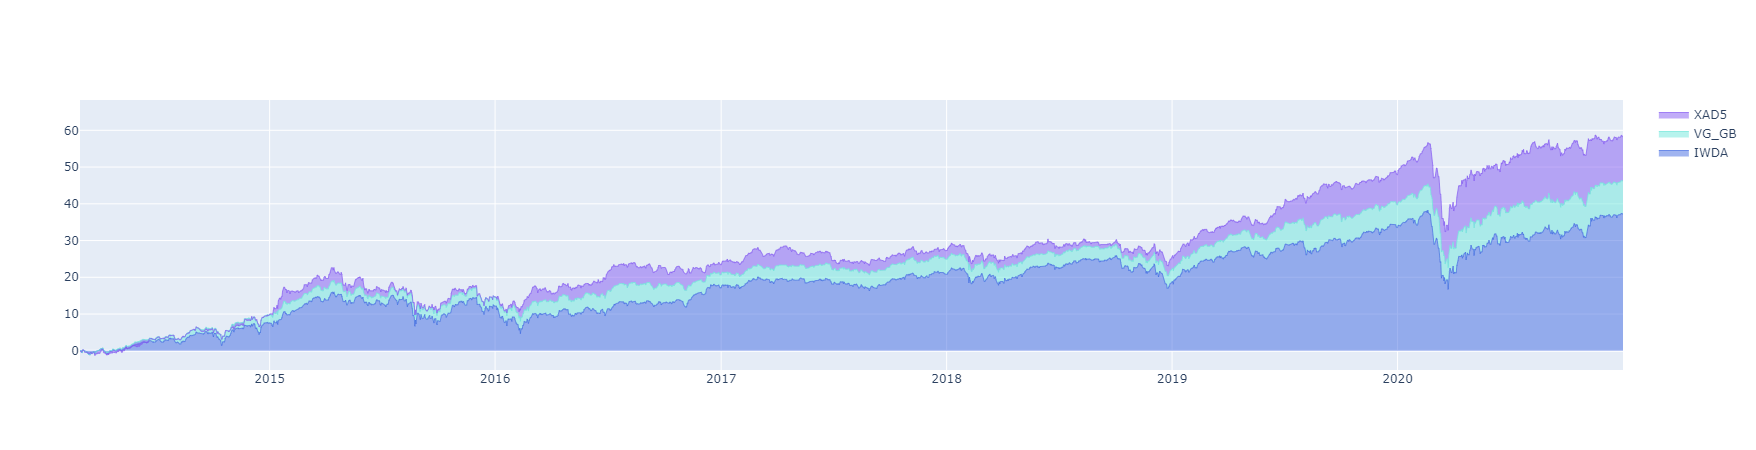

In [129]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=Portfolio.index,
    y=contribuição_individual['IWDA'],
    hoverinfo='x+y',
    mode='lines',
    name='IWDA',
    line=dict(width=0.7,
              color='royalblue'),
    stackgroup='one' # define stack group
))

fig.add_trace(go.Scatter(
    x=contribuição_individual.index,
    y=contribuição_individual['VG_GB'],
    hoverinfo='x+y',
    mode='lines',
    name='VG_GB',
    line=dict(width=0.7,
              color='rgb(111, 231, 219)'),
    stackgroup='one'
))

fig.add_trace(go.Scatter(
    x=contribuição_individual.index,
    y=contribuição_individual['XAD5'],
    hoverinfo='x+y',
    mode='lines',
    name='XAD5',
    line=dict(width=0.7,
              color='rgb(131, 90, 241)'),
    stackgroup='one'
))

fig.update_layout(yaxis_range=(Portfolio.iloc[0][0] - 100 - 5, Portfolio.iloc[-1][0] -100 + 10))
fig.show()

In [122]:
pd.set_option("display.max_rows", 20)
contribuição_individual.iloc[-1].sum()

58.2464905997404

In [126]:
Portfolio.iloc[0][0]

99.771272532719